<a href="https://colab.research.google.com/github/atlas-github/nih_lstm/blob/main/1_Difference_between_Machine_Learning_and_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Simplified example of classifying data in concentric circles

Imagine we have data points arranged in two concentric circles. A linear model (like Logistic Regression) will struggle to separate these classes because the decision boundary needs to be non-linear. Deep learning, with its ability to learn complex features, should be able to handle this better.

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Synthetic Concentric Circles Data: We use `sklearn.datasets.make_circles` to create a dataset where the two classes form inner and outer circles. This is a non-linearly separable dataset.

In [33]:
# Generate synthetic concentric circles data
X, y = make_circles(n_samples=500, noise=0.05, random_state=42) # Refer to cell below to visualize what this is

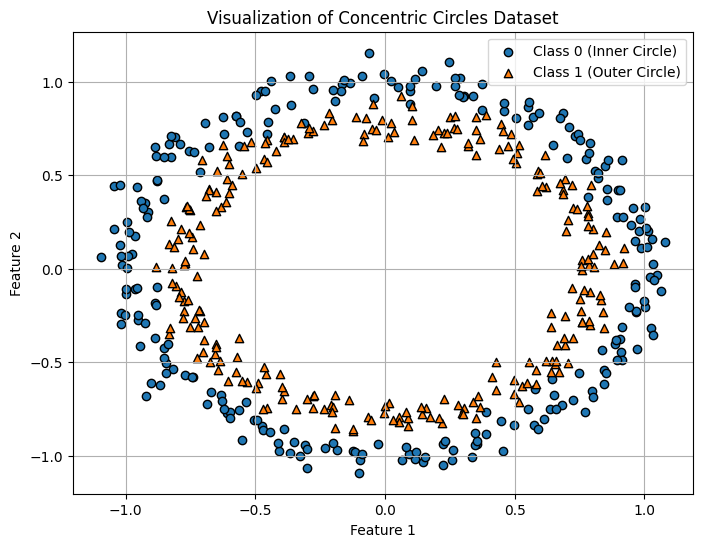

In [34]:
import matplotlib.pyplot as plt

# Generate the concentric circles data
X, y = make_circles(n_samples=500, noise=0.05, random_state=42)

# Visualize the data points
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], label='Class 0 (Inner Circle)', marker='o', edgecolors='k')
plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Class 1 (Outer Circle)', marker='^', edgecolors='k')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Visualization of Concentric Circles Dataset')
plt.legend()
plt.grid(True)
plt.show()

Data Splitting: We split the data into training and testing sets.

In [35]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Traditional Machine Learning (Logistic Regression):

1.   Train a standard `LogisticRegression` model. Logistic Regression tries to find a linear decision boundary.
2.   Evaluate its accuracy on the test set. The result is low accuracy because a straight line cannot effectively separate the circles.

In [36]:
# --- Traditional Machine Learning (Logistic Regression) ---
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f"Traditional ML (Logistic Regression) Accuracy: {accuracy_logistic:.4f}")

Traditional ML (Logistic Regression) Accuracy: 0.4733


Deep Learning (Simple Neural Network):

1.   We build a simple neural network with two hidden layers, each with a non-linear activation function (`relu`). These non-linearities allow the network to learn complex, non-linear decision boundaries.
2.   We train the network using `adam` optimizer and `binary_crossentropy` loss (suitable for binary classification).
3. We evaluate its accuracy on the test set. You should observe a significantly higher accuracy compared to Logistic Regression.

In [37]:
# --- Deep Learning (Simple Neural Network) ---
deep_model = Sequential([
    Dense(16, activation='relu', input_shape=(2,)), # Input layer with 2 features (x, y)
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid') # Output layer for binary classification
])

deep_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
deep_model.fit(X_train, y_train, epochs=100, verbose=0)
_, accuracy_deep = deep_model.evaluate(X_test, y_test, verbose=0)
print(f"Deep Learning (Simple Neural Network) Accuracy: {accuracy_deep:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Deep Learning (Simple Neural Network) Accuracy: 0.9733


During one epoch, the model processes each data point in the training set and updates its internal parameters (weights and biases) based on the errors it makes in predicting the output for that data point.

Key Points about Epochs:

1. **Full Dataset Pass**: An epoch involves processing every single training example once.
2. **Weight Updates**: After processing a batch of training examples (or sometimes after each individual example, depending on the optimization algorithm), the model's weights are adjusted.
3. **Multiple Epochs**: Training a neural network usually requires multiple epochs. The model needs to see the data many times to learn the underlying patterns effectively and generalize well to unseen data.
4. **Overfitting**: Training for too many epochs can lead to overfitting. This is when the model learns the training data too well, including its noise and specific details, and performs poorly on new, unseen data.
5. **Underfitting**: Training for too few epochs can lead to underfitting. This is when the model hasn't had enough exposure to the data to learn the underlying patterns and performs poorly on both the training and test sets.
6. **Batch Size and Iterations**: Within one epoch, the training data is often divided into smaller batches. Each batch is processed, and the model's weights are updated. One complete pass through all the batches constitutes one epoch. The number of batches is determined by the batch size. The number of times the model updates its weights within one epoch is equal to the number of batches (number of training samples / batch size). These individual batch processing steps are sometimes referred to as iterations or steps.


Visualization of Decision Boundaries:


1.   The `plot_decision_boundary` function takes a trained model and the data as input.
2. It creates a meshgrid of points and predicts the class for each point using the model.
3.   It then uses `plt.contourf` to visualize the decision boundary (the regions where the model predicts different classes) and `plt.scatter` to plot the actual data points.


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


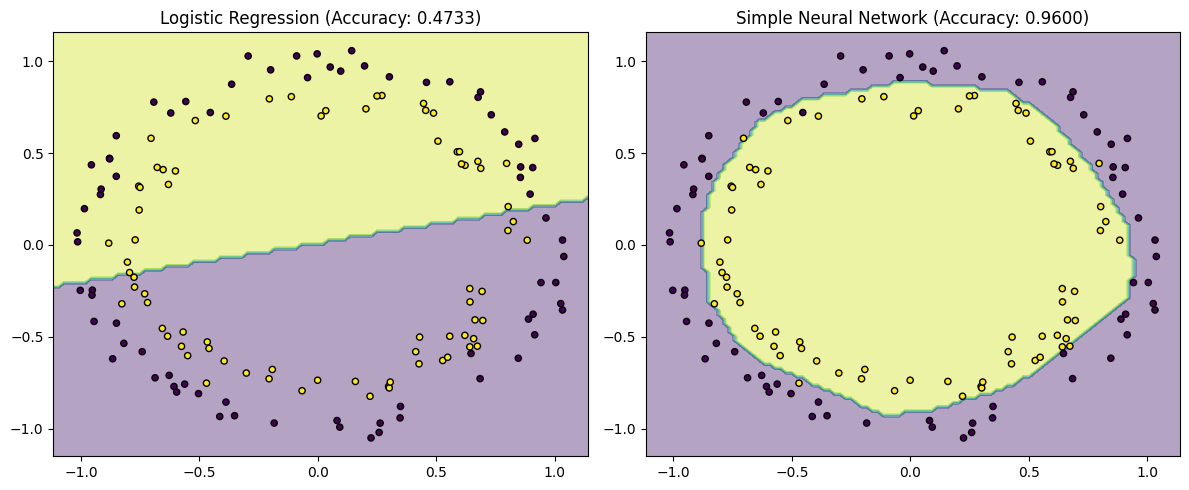

In [32]:
# --- Visualization of Decision Boundaries ---
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    if len(Z.shape) > 1 and Z.shape[1] > 1:
        Z = np.argmax(Z, axis=1)
    else:
        Z = (Z > 0.5).astype(int)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.title(title)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_decision_boundary(logistic_model, X_test, y_test, f"Logistic Regression (Accuracy: {accuracy_logistic:.4f})")

plt.subplot(1, 2, 2)
plot_decision_boundary(deep_model, X_test, y_test, f"Simple Neural Network (Accuracy: {accuracy_deep:.4f})")

plt.tight_layout()
plt.show()